### Attribute Information
- ID : Customer ID
- Age : Customer's age in completed years
- Experience : #years of professional experience
- Income : Annual income of the customer (\$000)
- ZIP Code : Home Address ZIP code.
- Family : Family size of the customer
- CCAvg : Avg. spending on credit cards per month ($000)
- Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage : Value of house mortgage if any. (\$000)
- Personal Loan : Did this customer accept the personal loan offered in the last campaign?
- Securities Account : Does the customer have a securities account with the bank?
- CD Account : Does the customer have a certificate of deposit (CD) account with the
bank?
- Online : Does the customer use internet banking facilities?
- Credit card : Does the customer use a credit card issued by UniversalBank?

From above attribute information, we can analyse that:
- Age, Experience, Income, CCAvg, Mortgage - are numerical variables
- Personal Loan - Target variable (Dependent)
- Rest all are categorical variables.
- ID - Customer ID, may not give any value towards target
- Education has different levels or order
- Family - Its family size, we can consider this also as ordered variable.
- ZIP code - categorical, no order.
- Securities Account, CD Account, Online, Credit card: These contain yes/no values, so do not have any order and we can say its in one-hot encoded form already.

In [1]:
# Load the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics

%matplotlib inline

In [2]:
# Load the data from file
DF = pd.read_csv("Bank_Personal_Loan_Data.csv")
DF.shape

(5000, 14)

In [3]:
DF.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
DF.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

There are 5000 values for 'ID', which is same as total number of records. So ID column can be dropped.

In [5]:
DF = DF.drop(['ID'], axis=1)
DF.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
DF.isnull().values.any()

False

No Missing values in the dataset.

In [7]:
DF['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

As given in question, we can see, only 480 People out of 5000 have taken loan in past. So the target variable is imbalanced and hence the model might be biased towards -ve event (personal-loan-not-taken category).

In [8]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


Almost all numerical columns are represented as int64 datatype except CCAvg. Currently these may not have decimal values, but when we scale in future, there it may convert to float values. So We can convert numerical variables to float datatype.

In [9]:
# Unique values in other fields.

#print("AGE unique values:", DF.Age.unique())
#print("Income unique values:", DF.Income.unique())
#print("CC avg spend:", DF.CCAvg.unique())
#print("Mortgage:", DF.Mortgage.unique())

In [10]:
DF[["Age","Experience","Income","Mortgage"]] = DF[["Age","Experience","Income","Mortgage"]].astype(float)
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null float64
Experience            5000 non-null float64
Income                5000 non-null float64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null float64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(5), int64(8)
memory usage: 507.9 KB


We converted the numerical variables' type to float.

In [11]:
DF.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


- Experience has min value -3, which seems wrong as experience cannot be -ve. We will check how many negative values are there and accordingly we need to replace with some other value.
- CCAvg seems right skewed (Max - Q3 is high) and have outliers.
- Income also seems right skewed with outliers.
- Mortgage is extremely right skewed. Median lies at 0, whereas Q3 at 101 and Max at 635.
- Age and Experience seems fine.
- ZIP code shows min value 9307 (4 digit code) as compared to other zip codes (5 digit). There might be a mistake too. We will consider that as outlier.

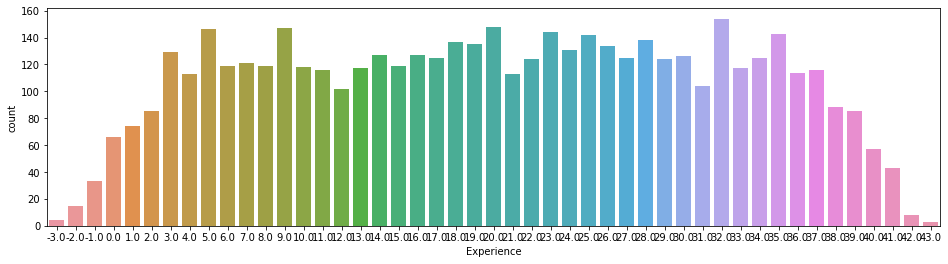

In [12]:
fig, ax = plt.subplots(figsize=(16,4))
sns.countplot(DF.Experience, ax=ax);

From above plot, we can see negative values -3, -2, -1 in Experience, all are below 40 in count. Lets check how many are there in each.

In [13]:
print("Total negative values in Experience:", DF[DF.Experience < 0].Experience.count())
DF[DF.Experience < 0].Experience.value_counts()

Total negative values in Experience: 52


-1.0    33
-2.0    15
-3.0     4
Name: Experience, dtype: int64

Total 52 negative values, out of which 33 are -1 year exp, 15 are -2year exp and 4 are -3year exp.
Practically which is impossible to have. 

We can assume the negative values entered are by mistake and we can replace with absoulte values of them.

In [14]:
# Lets replace Exp values with its absoulte values, so -ve values will b replaced with +ve.
DF.Experience = DF.Experience.apply(abs)
DF[DF.Experience < 0].Experience.count()

0

No more -ve values in Experience.

In [15]:
DF.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


Now we can see min value of Experience is 0 years.

In [16]:
#Considering ZIP code is of 5 digits
print("5-digit Zip code count:", DF[DF['ZIP Code'] >= 10000]['ZIP Code'].count())
print("4-digit Zip code count:", DF[DF['ZIP Code'] < 10000]['ZIP Code'].count())

5-digit Zip code count: 4999
4-digit Zip code count: 1


We have one outlier in zip code, Only 1 zip code is of 4-digit. Rest all are 5-digit codes.
Lets remove the outlier and proceed.

In [17]:
zip_error = DF[DF['ZIP Code'] < 10000] 
print(zip_error)
#ind = DF[DF['ZIP Code'] < 10000].index
DF_data = DF.drop(DF.index[zip_error.index])
DF_data.shape

      Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
384  51.0        25.0    21.0      9307       4    0.6          3       0.0   

     Personal Loan  Securities Account  CD Account  Online  CreditCard  
384              0                   0           0       1           1  


(4999, 13)

Removed one entry from the dataset which had wrong zip code.

In [18]:
DF_data['Personal Loan'].value_counts()

0    4519
1     480
Name: Personal Loan, dtype: int64

Now we have 4519 people who have not taken loan in past.

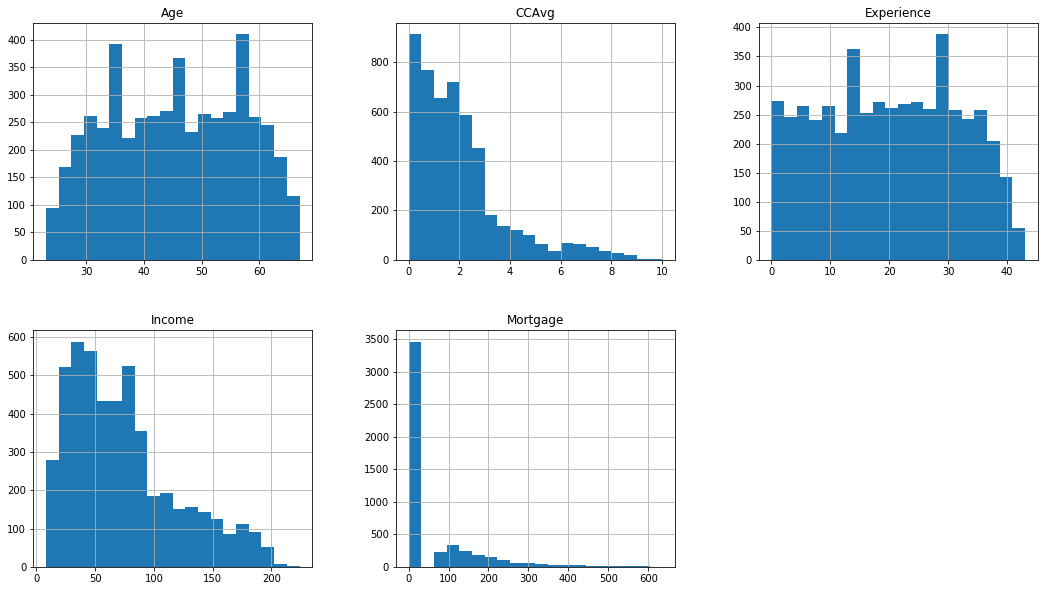

In [19]:
# Lets check the distribution of numerical values.
DF_data[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']].hist(bins=20, figsize=(18,10), layout=(2,3)); 

Dataset has
- People from ~20 to ~70 age group with balanced amount in each age group.
- Experience varies between 0 to ~45years with equal amount from each exp.
- More people have less income range and Less people have more income range.
- For most of the people, avg spending on credit card is less.
- Most of the people have zero Mortgage value. This is extremely right skewed.

0.0      3461
98.0       17
89.0       16
103.0      16
91.0       16
Name: Mortgage, dtype: int64

Total records (altogether) which has some mortgage value: 1538


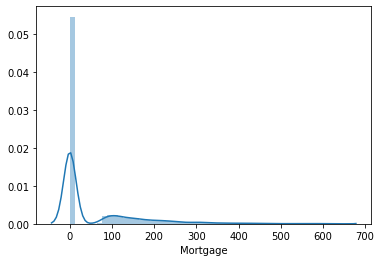

In [20]:
print(DF_data.Mortgage.value_counts().head())
print()
print("Total records (altogether) which has some mortgage value:", DF_data[DF_data.Mortgage>0].Mortgage.value_counts().sum())
sns.distplot(DF_data.Mortgage);

Here we can see Mortgage data is extremely right skewed. Most of the data (3461 records) present at 0 value and least amout of data (1538 records) has some mortgage value.

- Log transformation might help in this case to bring the data to lower range.
- As we cannot transform 0 values, so we will add 1 and then take logarithm of the values.

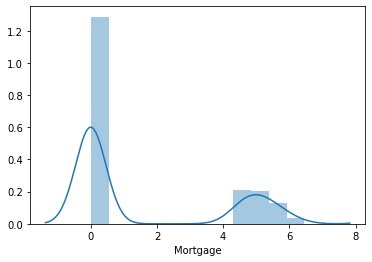

In [21]:
# we can use log1p
mortgage_log = np.log1p(DF_data.Mortgage)
sns.distplot(mortgage_log)

Here we can see after log transformation, the range has come down. Lets analyse the distribution.

In [22]:
DF_data.Mortgage = mortgage_log
print(DF_data.Mortgage.describe())

count    4999.000000
mean        1.567296
std         2.366560
min         0.000000
25%         0.000000
50%         0.000000
75%         4.624973
max         6.455199
Name: Mortgage, dtype: float64


We can see, Q3 lies at 4.6 and Max lies at 6.4. But still Q2 is at 0.

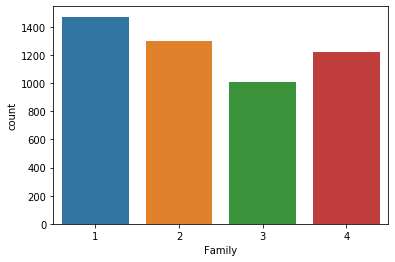

In [23]:
#sns.distplot(DF_data.Family);
sns.countplot(DF_data.Family);

From above plot, we can see there are more families with size of 1 and less families with size of 3. We can further analyse how many of each family size took loan.

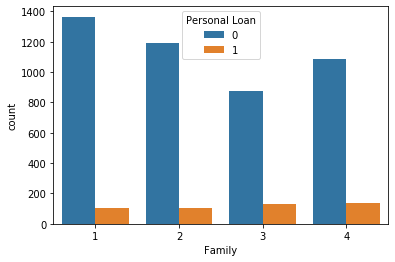

In [24]:
sns.countplot(DF_data.Family, hue=DF_data['Personal Loan']);

From above plot, we can see people have taken loan from each family size, but the % is quite low. We can check the exact count and % from each family category.

In [25]:
totalFamilyCount = DF_data.Family.value_counts()
totalFamilyLoanCount = DF_data[DF_data['Personal Loan']==1].Family.value_counts()
print('Total counts in each family:')
print(totalFamilyCount)
print('-------------------')
print()
print("Total count of people who took/didn't take loan in each family:")
print(DF_data.groupby('Personal Loan').Family.value_counts())
print()
print('% of people have taken loan in each family category:')
print((totalFamilyLoanCount/totalFamilyCount) * 100)

Total counts in each family:
1    1472
2    1296
4    1221
3    1010
Name: Family, dtype: int64
-------------------

Total count of people who took/didn't take loan in each family:
Personal Loan  Family
0              1         1365
               2         1190
               4         1087
               3          877
1              4          134
               3          133
               1          107
               2          106
Name: Family, dtype: int64

% of people have taken loan in each family category:
1     7.269022
2     8.179012
3    13.168317
4    10.974611
Name: Family, dtype: float64


- We can see ~7% to ~13% people have taken loan as per family sizes.
- Comparatively more people, from Family size of 3 and 4, have taken loan than family size of 1 and 2.

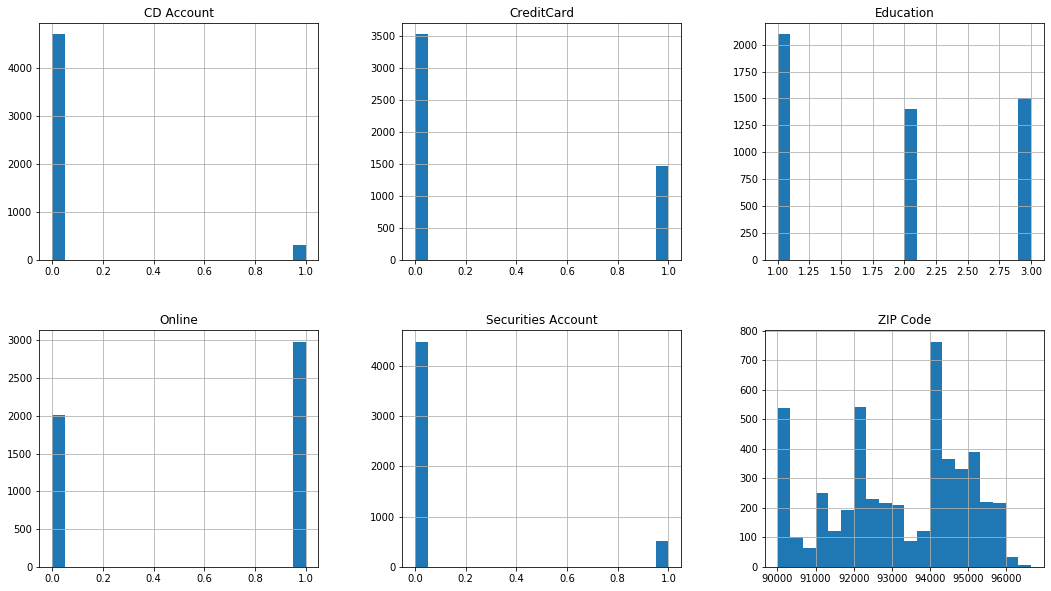

In [26]:
# Lets check the categorical variables

DF_data[['Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'ZIP Code']].hist(bins=20, figsize=(18,10), layout=(2,3)); 

- Most of the people are undergraduate in the dataset.
- Most of the people do not have Securities Account and CD account.
- Most of the people use internet banking. 
- Most people do not hold a credit card (from Universal Bank).
- People are from different localities within a city as per zip code.

In [27]:
corr = DF_data.corr()
print(corr)

                         Age  Experience    Income  ZIP Code    Family  \
Age                 1.000000    0.993991 -0.055164 -0.030526 -0.046566   
Experience          0.993991    1.000000 -0.046785 -0.030833 -0.051981   
Income             -0.055164   -0.046785  1.000000 -0.030725 -0.157232   
ZIP Code           -0.030526   -0.030833 -0.030725  1.000000  0.027532   
Family             -0.046566   -0.051981 -0.157232  0.027532  1.000000   
CCAvg              -0.051941   -0.049676  0.645931 -0.012197 -0.109088   
Education           0.041211    0.013808 -0.187277 -0.008254  0.064581   
Mortgage           -0.010156   -0.009534  0.037542  0.005891  0.000561   
Personal Loan      -0.007694   -0.008276  0.502459 -0.002977  0.061471   
Securities Account -0.000403   -0.000960 -0.002695  0.002418  0.020094   
CD Account          0.008068    0.009757  0.169703  0.021669  0.014184   
Online              0.013622    0.013982  0.014397  0.028328  0.010127   
CreditCard          0.007530    0.0087

Coorelation table is big due to more number of columns. We can better analyse this with help of heatmap.

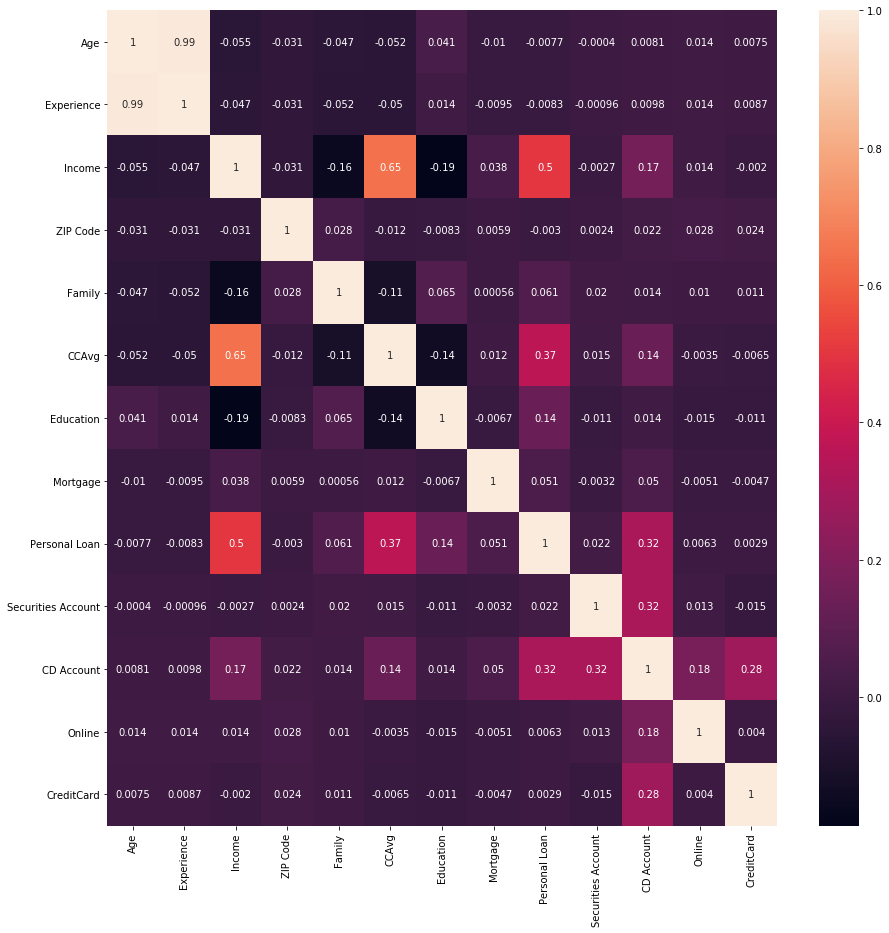

In [28]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True, ax=ax);

 We can see:
- Age and Experience are highly correlated. As age increases, experience also increases.
- Income and CCAvg are also +vely correlated. More the income, more the CC spending.
- Income somewhat impacts the decision of taking personal loan, as we can see 50% correlation.
- Also Avg CC spending, CD account impacts a little on personal loan decision.

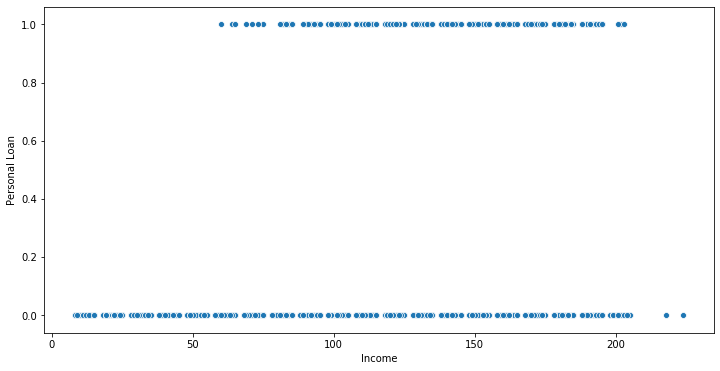

In [29]:
# Lets see which income category people have taken loan.
f, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(DF_data['Income'], DF_data['Personal Loan']);

Looks like few higher income group people have taken loan and few have not. Also few middle income group people have taken loan.

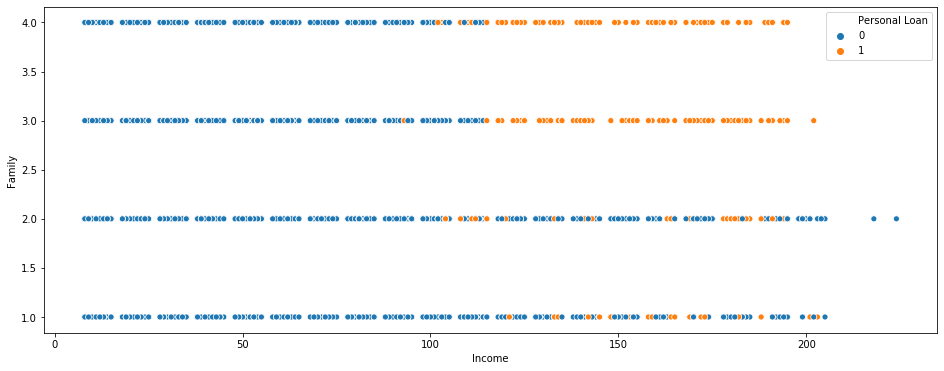

In [30]:
# Lets see which Family size has taken loan and they belong to which income group.
f, ax = plt.subplots(figsize=(16,6))
sns.scatterplot(DF_data['Income'], DF_data['Family'], hue=DF_data['Personal Loan']);

More specifically, in higher income groups, mostly people with family size 3 and 4 have taken loan in the past.

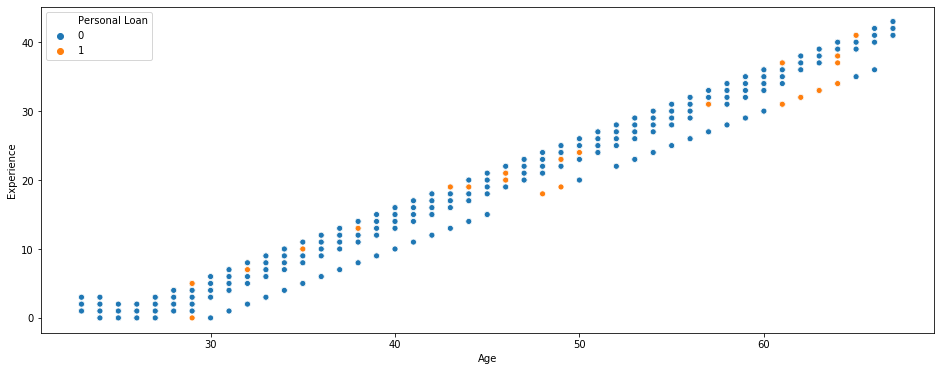

In [31]:
# Lets see which income category people have taken loan.
f, ax = plt.subplots(figsize=(16,6))
sns.scatterplot(DF_data['Age'], DF_data.Experience, hue=DF_data['Personal Loan']);

As we saw earlier from heatmap, Age and Experience are positively highly correlated. We can see across the age group, people have taken loan.

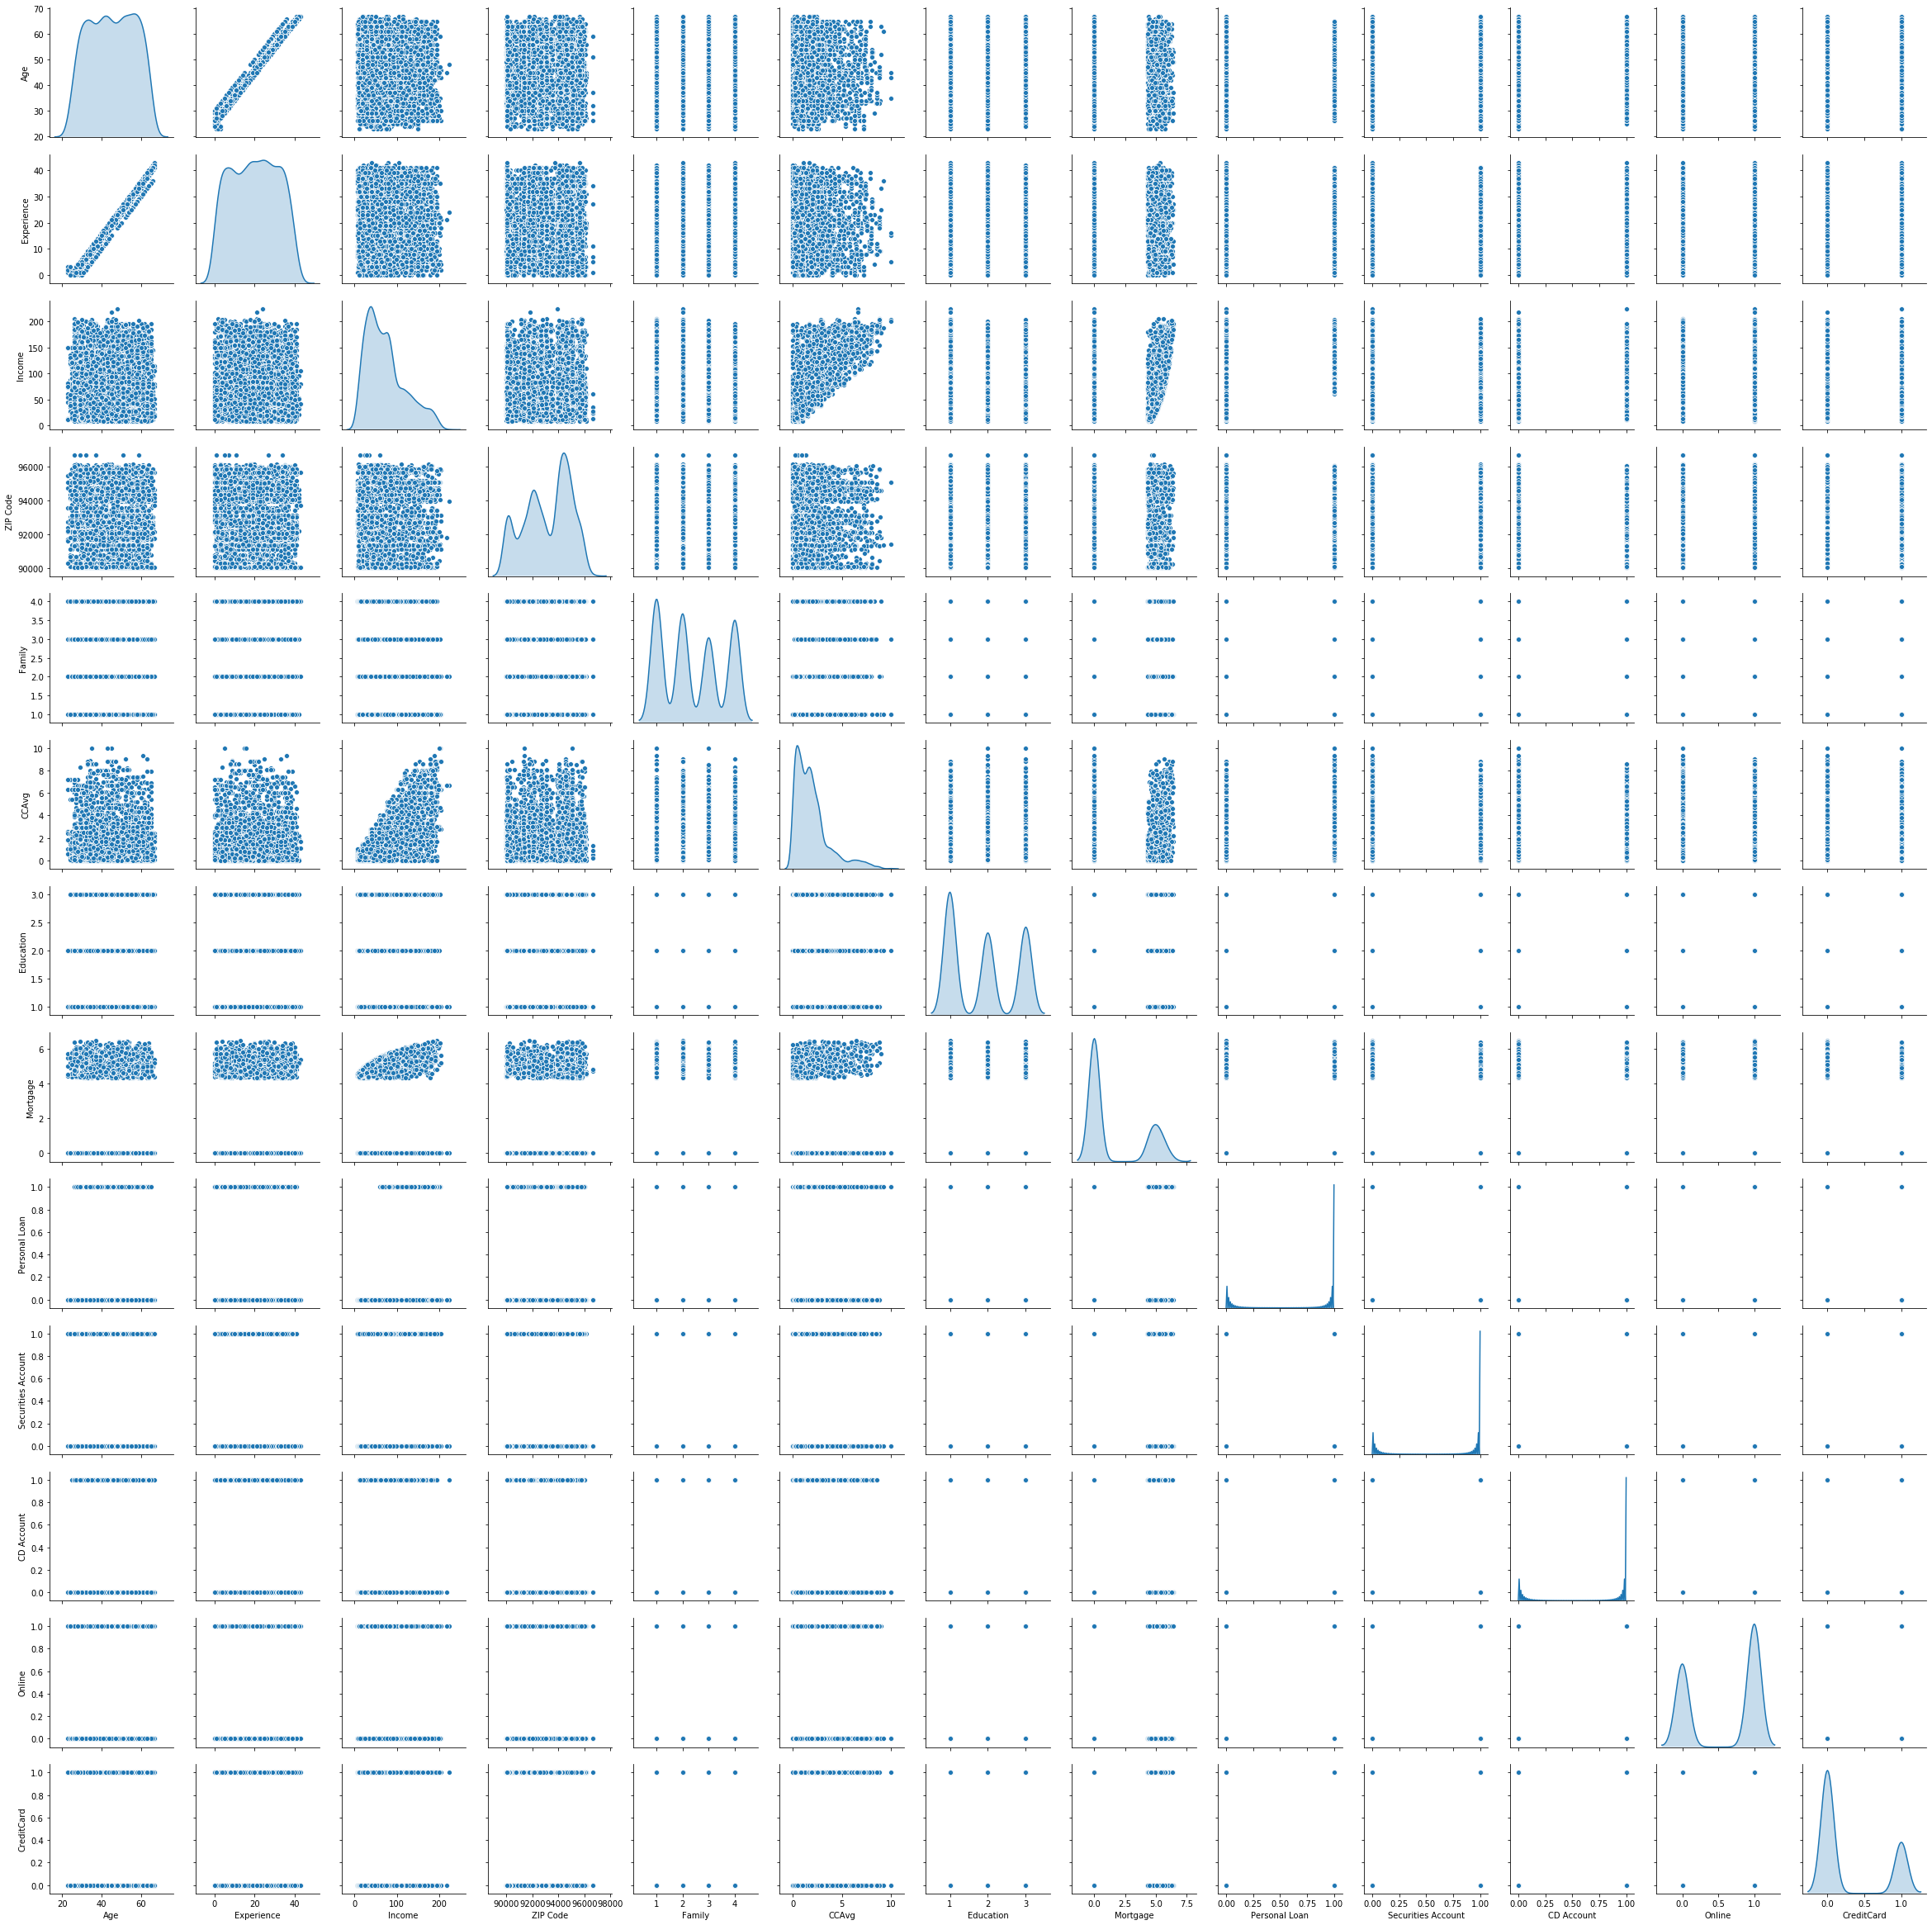

In [32]:
sns.pairplot(DF_data, diag_kind='kde');

- Age and Experience are highly +vely correlated.
- Income and CCAvg are alos +vely correlated.
- Across all age groups, Mid to High income group people have taken loan.
- Most people do not have mortgage. Who have mortgage, they are from across all age group, mostly with mid to high income level.

### One Hot Encoding for Education

In [33]:
DF_data.Education.unique()

array([1, 2, 3], dtype=int64)

In [34]:
# Let's one-hot encode the Education variable

# Education seems to be an ordinal categorical variable.
# As per problem statement, lets apply one-hot encoding.

DF_data.Education = DF_data.Education.replace({1: 'UGrad', 2: 'Grad', 3: 'Pro'})
DF_data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25.0,1.0,49.0,91107,4,1.6,UGrad,0.0,0,1,0,0,0
1,45.0,19.0,34.0,90089,3,1.5,UGrad,0.0,0,1,0,0,0
2,39.0,15.0,11.0,94720,1,1.0,UGrad,0.0,0,0,0,0,0
3,35.0,9.0,100.0,94112,1,2.7,Grad,0.0,0,0,0,0,0
4,35.0,8.0,45.0,91330,4,1.0,Grad,0.0,0,0,0,0,1


In [35]:
DF_data.Education.unique()

array(['UGrad', 'Grad', 'Pro'], dtype=object)

In [36]:
DF_data2 = pd.get_dummies(DF_data, columns=['Education'], drop_first=True)
DF_data2.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Pro,Education_UGrad
0,25.0,1.0,49.0,91107,4,1.6,0.0,0,1,0,0,0,0,1
1,45.0,19.0,34.0,90089,3,1.5,0.0,0,1,0,0,0,0,1
2,39.0,15.0,11.0,94720,1,1.0,0.0,0,0,0,0,0,0,1
3,35.0,9.0,100.0,94112,1,2.7,0.0,0,0,0,0,0,0,0
4,35.0,8.0,45.0,91330,4,1.0,0.0,0,0,0,0,1,0,0


Education is dropped and 2 new features created after one-hot encoding, i.e. Education_Pro and Education_UGrad.

In [37]:
print(DF_data2.shape)
DF_data2.columns

(4999, 14)


Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard', 'Education_Pro', 'Education_UGrad'],
      dtype='object')

In [38]:
#Lets separate the independent variables and dependent variable
X = DF_data2.drop(['Personal Loan'], axis=1)
y = pd.DataFrame(DF_data2['Personal Loan'], columns=['Personal Loan'])
print(X.shape, y.shape)

(4999, 13) (4999, 1)


Now we have 13 features with 1 target.

### Split the data

In [39]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3499, 13), (1500, 13), (3499, 1), (1500, 1))

In [40]:
X_train.shape[0]/X.shape[0], X_test.shape[0]/X.shape[0] 

(0.6999399879975995, 0.30006001200240046)

Almost ~70-30 split.

In [41]:
X_train.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Pro,Education_UGrad
718,56.0,31.0,21.0,90024,2,0.2,4.927254,0,1,1,1,1,0
2497,33.0,9.0,14.0,95133,3,0.9,4.744932,0,0,0,0,1,0
2470,33.0,7.0,81.0,92122,2,4.5,5.236442,0,1,1,1,1,0
1376,63.0,39.0,45.0,92870,4,1.3,4.465908,0,0,0,0,0,0
2743,32.0,8.0,22.0,94583,4,0.7,0.000000,0,0,1,1,0,0


### Scaling

In [42]:
# Lets normalize the data
scaler = StandardScaler();
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train_scaled.shape, X_test_scaled.shape

((3499, 13), (1500, 13))

In [43]:
X_train_scaled.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Pro,Education_UGrad
0,0.936824,0.961837,-1.126552,-1.782665,-0.341465,-0.980527,1.398887,-0.336552,3.987904,0.824982,1.554668,1.521002,-0.838258
1,-1.078056,-0.976745,-1.277380,1.119138,0.534479,-0.579402,1.322311,-0.336552,-0.250758,-1.212147,-0.643224,1.521002,-0.838258
2,-1.078056,-1.152980,0.166260,-0.591045,-0.341465,1.483528,1.528748,-0.336552,3.987904,0.824982,1.554668,1.521002,-0.838258
3,1.550048,1.666775,-0.609427,-0.166197,1.410422,-0.350187,1.205119,-0.336552,-0.250758,-1.212147,-0.643224,-0.657461,-0.838258
4,-1.165660,-1.064863,-1.105005,0.806750,1.410422,-0.694009,-0.670586,-0.336552,-0.250758,0.824982,1.554668,-0.657461,-0.838258


### Train model

In [44]:
# Lets define a common function for classification

def train_model(m, X_train, X_test, y_train, y_test):
    #print("model:", m)
    #Lets create a model
    if m == 'lreg':
        name = 'Logistic Regression'
        model = LogisticRegression(solver='lbfgs')
    elif m == 'knn':
        name = 'KNN'
        model = KNeighborsClassifier(n_neighbors=3, weights='distance')
    elif m == 'nb':
        name = 'Gaussian Naive Bayes'
        model = GaussianNB()
    elif m == 'svm':
        name = "SVM"
        model = svm.SVC(gamma=0.025, C=9)
    
    model.fit(X_train, y_train['Personal Loan'])

    #predict on test dataset
    y_predict = model.predict(X_test)

    #print("ACTUAL:", y_test['Personal Loan'].value_counts())
    #y_predict_df = pd.DataFrame(y_predict, columns=['Loan'])
    #print("PREDICTED:", y_predict_df.Loan.value_counts())
    
    score_train = model.score(X_train, y_train)
    print("Train score:", score_train)

    #score_test = model.score(X_test, y_test)
    #print("Test Score:", model_score)
    
    #report = metrics.classification_report(y_test, y_predict)
    #print(report)
    
    acc = metrics.accuracy_score(y_test, y_predict)
    acc = metrics.accuracy_score(y_test, y_predict)
    rec = metrics.recall_score(y_test, y_predict)
    pre = metrics.precision_score(y_test, y_predict)
    
    cm = metrics.confusion_matrix(y_test, y_predict)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn/(tn+fp)
    
    f1 = metrics.f1_score(y_test, y_predict)
    #print(cm)
    return (name, acc, rec, pre, specificity, f1)

In [45]:
# Lets train various models with our data.

data = []
logreg = train_model('lreg', X_train_scaled, X_test_scaled, y_train, y_test)
data.append(logreg)

knn = train_model('knn', X_train_scaled, X_test_scaled, y_train, y_test)
data.append(knn)

nb = train_model('nb', X_train_scaled, X_test_scaled, y_train, y_test)
data.append(nb)

svmm = train_model('svm', X_train_scaled, X_test_scaled, y_train, y_test)
data.append(svmm)

#data = [logreg, knn, nb, svmm]
performance = pd.DataFrame(data, columns=['Model', 'accuracy', 'recall', 'precision', 'specificity', 'f1_score'])
performance

Train score: 0.9622749356959132
Train score: 1.0
Train score: 0.8976850528722492
Train score: 0.9885681623320949


,Model,accuracy,recall,precision,specificity,f1_score
0,Logistic Regression,0.957333,0.662162,0.875000,0.989645,0.753846
1,KNN,0.957333,0.581081,0.977273,0.998521,0.728814
2,Gaussian Naive Bayes,0.900000,0.608108,0.494505,0.931953,0.545455
3,SVM,0.981333,0.864865,0.941176,0.994083,0.901408


We can see SVM performed well compared to other models.
- Accuracy is better than other models, however we cannot rely on accuracy.
- To balance the performance measures, we are looking for the value of F1-score, which is far better than other models.

- Current value for C and Gamma are chosen considering best value of F1-score. (C = 9, Gamma = 0.025)
- However we can chose other values for C and Gamma, if we are looking best values for other performance measures(such as Recall, Precision and/or Specificity).

- Various values of C and Gamma are given below for best scores of performance measures.
- We can see for C=2 and Gamma=0.015, we have Best values of Precision and Specificity, however F1-score value reduces to 0.825397.

### Finding best k for knn

Best value for k: 3


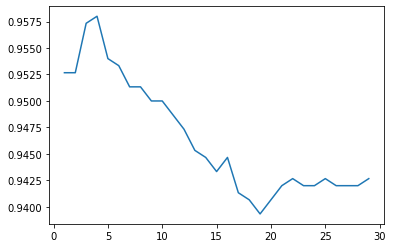

In [46]:
scores =[]
for k in range(1,30,1):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train_scaled, y_train['Personal Loan'])
    scores.append(NNH.score(X_test_scaled, y_test))

plt.plot(range(1,30,1),scores)
print("Best value for k:", scores.index(max(scores)))

### Tune C and Gamma for SVM

In [47]:
def tuneSVM(X_train, X_test, y_train, y_test, c, gam):
    c_val = str(c)
    g_val = str(gam)
    #print(c_val, g_val)
    model = svm.SVC(gamma=gam, C=c) 
    
    model.fit(X_train, y_train['Personal Loan'])
    y_predict = model.predict(X_test)
    score_train = model.score(X_train, y_train)
    print("Train score:", score_train, 'for C=',c_val,'and Gamma=',g_val)
    acc = metrics.accuracy_score(y_test, y_predict)
    acc = metrics.accuracy_score(y_test, y_predict)
    rec = metrics.recall_score(y_test, y_predict)
    pre = metrics.precision_score(y_test, y_predict)
    
    cm = metrics.confusion_matrix(y_test, y_predict)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn/(tn+fp)
    
    #cr = metrics.classification_report(y_test, y_predict)
    #print(cr)
    
    f1 = metrics.f1_score(y_test, y_predict)
    
    return (c_val, g_val, acc, rec, pre, specificity, f1)

In [48]:
perf_list = []

c_val = list(range(2, 10, 1))
g_val = [0.015, 0.025, 0.0215, 0.125]
for c in c_val:
    for gam in g_val:
        svmm = tuneSVM(X_train_scaled, X_test_scaled, y_train, y_test, c, gam)
        perf_list.append(svmm)

Train score: 0.9719919977136324 for C= 2 and Gamma= 0.015
Train score: 0.9785653043726779 for C= 2 and Gamma= 0.025
Train score: 0.9771363246641898 for C= 2 and Gamma= 0.0215
Train score: 0.9917119176907688 for C= 2 and Gamma= 0.125
Train score: 0.9757073449557017 for C= 3 and Gamma= 0.015
Train score: 0.9805658759645614 for C= 3 and Gamma= 0.025
Train score: 0.9794226921977708 for C= 3 and Gamma= 0.0215
Train score: 0.9937124892826522 for C= 3 and Gamma= 0.125
Train score: 0.9779937124892827 for C= 4 and Gamma= 0.015
Train score: 0.9842812232066305 for C= 4 and Gamma= 0.025
Train score: 0.9819948556730494 for C= 4 and Gamma= 0.0215
Train score: 0.994569877107745 for C= 4 and Gamma= 0.125
Train score: 0.9788511003143755 for C= 5 and Gamma= 0.015
Train score: 0.9859959988568162 for C= 5 and Gamma= 0.025
Train score: 0.9837096313232352 for C= 5 and Gamma= 0.0215
Train score: 0.9951414689911403 for C= 5 and Gamma= 0.125
Train score: 0.9808516719062589 for C= 6 and Gamma= 0.015
Train score

In [49]:
svm_mat = pd.DataFrame(perf_list, columns=['C', 'Gamma', 'accuracy', 'recall', 'precision', 'specificity', 'f1_score'])
svm_mat

,C,Gamma,accuracy,recall,precision,specificity,f1_score
0,2,0.015,0.970667,0.702703,1.000000,1.000000,0.825397
1,2,0.025,0.976000,0.777027,0.974576,0.997781,0.864662
2,2,0.0215,0.976000,0.770270,0.982759,0.998521,0.863636
3,2,0.125,0.977333,0.844595,0.919118,0.991864,0.880282
4,3,0.015,0.975333,0.756757,0.991150,0.999260,0.858238
5,3,0.025,0.978667,0.804054,0.975410,0.997781,0.881481
6,3,0.0215,0.976000,0.777027,0.974576,0.997781,0.864662
7,3,0.125,0.974667,0.837838,0.898551,0.989645,0.867133
8,4,0.015,0.976667,0.783784,0.974790,0.997781,0.868914
9,4,0.025,0.980000,0.824324,0.968254,0.997041,0.890511


In [50]:
# Best value of C and Gamma for best F1-score
svm_mat[svm_mat.f1_score == max(svm_mat.f1_score)]

,C,Gamma,accuracy,recall,precision,specificity,f1_score
29,9,0.025,0.981333,0.864865,0.941176,0.994083,0.901408


In [51]:
svm_mat[svm_mat.f1_score > 0.89]

,C,Gamma,accuracy,recall,precision,specificity,f1_score
9,4,0.025,0.980000,0.824324,0.968254,0.997041,0.890511
13,5,0.025,0.981333,0.837838,0.968750,0.997041,0.898551
14,5,0.0215,0.980000,0.824324,0.968254,0.997041,0.890511
17,6,0.025,0.980667,0.837838,0.961240,0.996302,0.895307
18,6,0.0215,0.981333,0.837838,0.968750,0.997041,0.898551
21,7,0.025,0.980667,0.837838,0.961240,0.996302,0.895307
22,7,0.0215,0.981333,0.837838,0.968750,0.997041,0.898551
24,8,0.015,0.980000,0.824324,0.968254,0.997041,0.890511
25,8,0.025,0.981333,0.858108,0.947761,0.994822,0.900709
26,8,0.0215,0.981333,0.837838,0.968750,0.997041,0.898551
